# Use Proximity

The `arcgis.geoanalytics.summarize_data` submodule contains functions that calculate total counts, lengths, areas, and basic descriptive statistics of features and their attributes within areas or near other features.

<h2>Table of contents</h2>
    
- [Create_Buffers](#Create-Buffers)
- [Trace Proximity Events](#Trace-Proximity-Events)

This toolset uses distributed processing to complete analytics on your GeoAnalytics Server.

<table>
  <tr>
    <th><center>Tool</center></th>
    <th><center>Description</center></th>    
  </tr>
  <tr>
      <td><a href="https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-create-buffers.htm"><p align="left">create_buffers</p></a></td>
      <td><p align="left"> The Create Buffers tool creates areas around input point, line, or area features to a specified distance.</p></td>
  </tr>
  <tr>
      <td><a href="https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-trace-proximity-events.htm"><p align="left">trace_proximity_events</p></a></td>
      <td><p align="left">The Trace Proximity Events tool traces events near each other in space (location) and time. The input layer must be time-enabled points that represent an instant in time.</p></td>
  </tr>
  <tr>

**Note**: The purpose of the notebook is to show examples of the different tools that can be run on an example dataset.

In [2]:
# connect to Enterprise GIS
from arcgis.gis import GIS
import arcgis.geoanalytics
gis = GIS()
portal_gis = GIS("your_enterprise_portal")

<b>Search items to run your analysis

In [23]:
search_result1 = gis.content.get("8e46fd0d3cd8452696fcd6baaab2df6f")
search_result1

<Item title:"PUSD Schools" type:Feature Layer Collection owner:Learn_ArcGIS>

In [13]:
search_result2 = gis.content.get("5183636f099c48789628226e5730fb13")
search_result2

<Item title:"Traffic Collisions" type:Feature Layer Collection owner:api_data_owner>

In [15]:
schools = search_result1.layers[0]
collisions = search_result2.layers[0]

## Create Buffers

The [`create_buffers`]((https://developers.arcgis.com/rest/services-reference/enterprise/create-buffers.htm)) tool creates areas around input point, line, or area features to a specified distance.

<center><img src="../../static/img/guide_img/ga/reconstruct_tracks.png" height="300" width="300"></center>

Buffers are typically used to create areas that can be further analyzed using other tools, like `aggregate_points`. For example, when asking the question, “Which buildings are within one mile of the school?”, we can derive the answer by creating a one-mile buffer around the school and overlaying the buffer with the layer containing building footprints. The end result is a layer of the buildings within one mile of the school.

In [16]:
from arcgis.geoanalytics.use_proximity import create_buffers

In [ ]:
create_buffers(input_layer=schools, 
               output_name='buffered_areas_around_schools',
               distance=1,
               distance_unit='Kilometers')

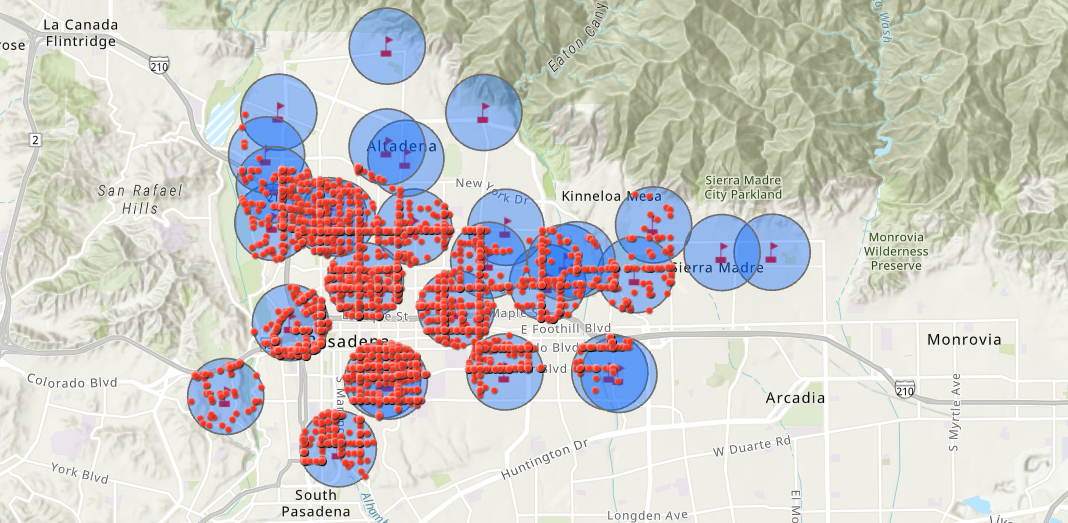

## Trace Proximity Events

The Trace Proximity Events tool traces events near each other in space (location) and time. The input layer must be of time-enabled points that represent an instant in time.

<center><img src="../../static/img/guide_img/ga/trace_proximity_events.png" height="300" width="300"></center>

The `trace_proximity_events` task analyzes time-enabled point features representing moving entities. The task will follow entities of interest in space (location) and time to see which other entities the entities of interest have interacted with. The trace will continue from entity to entity to a configurable maximum degrees of separation from the original entity of interest.

For example, suppose an organization monitors company-issued devices carried by workers. The company is interested in determining which employees were near an individual known to have COVID-19. Using the point layer representing device locations by time, the organization can identify devices that have been within 6 meters and 5 minutes of the contagious person, as well as other possibly contagious employees.

As another example, an NGO is monitoring salmon populations using GPS and is interested in tracking the spread of salmon lice between escaped farmed salmon and wild populations. Some GPS-tagged farmed salmon could then be tracked to see if they came into close proximity with any tagged wild populations. The NGO could then follow those wild populations that may further spread the disease. The measurements could also include a depth field, allowing the NGO to use the `attributeMatchCriteria` parameter to only find fish at a similar depth.

In [7]:
from arcgis.geoanalytics.use_proximity import trace_proximity_events

In [ ]:
trace_contacts = trace_proximity_events(input_points=seatle_example_tracks,
                                        entity_id_field='user_id',
                                        entities_of_interest_ids='user3',
                                        spatial_search_distance=2,
                                        spatial_search_distance_unit='Meters',
                                        temporal_search_distance=10,
                                        temporal_search_distance_unit='Minutes',
                                        output_name='trace contacts')

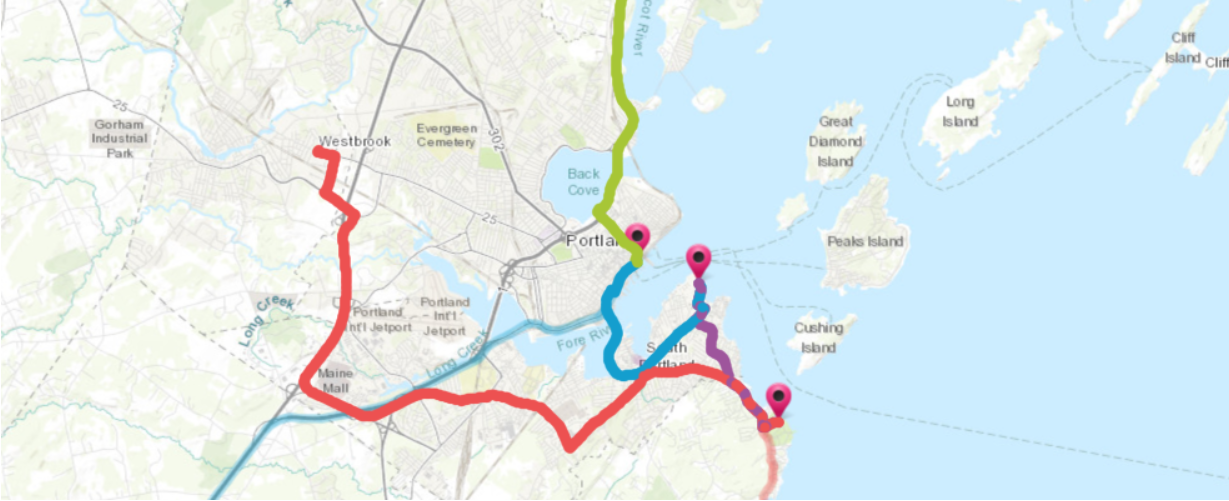

In this guide, we learned about about proximity tools. In the next guide, we will learn about the data enrichment module.